# This notebook is for Analyzing Enron Email Dataset

## Tasks to Do

1. Select emails base on keywords 
    1. Load, Clean & Parse Emails to get started
    2. Select emails based on keywords
2. Time series analysis of the emails
    1. Parse string to Datetime object for doing time series analysis
    2. Plot time series
3. Email Clustering
    1. Rremoving stopwords and vectorize the content
    2. Run KMeans on the Data
    3. Find important keywords from for each clusters
    4. Find topics from the text (??)
4. Sentiment Analysis
    1. Do Sentiment analysis on the email texts
    2. plot sentiments 


#### Importing modules

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans, MiniBatchKMeans
import re

%load_ext autoreload
%autoreload 2

from parse_utils import parse_raw_message, parse_into_emails
from plot_utils import top_mean_feats, top_feats_per_cluster, plot_tfidf_classfeats_h
plt.rcParams["figure.figsize"] = (20,8) #Setting global parameters for plots


#### Reading Data from the directory

In [2]:
df = pd.read_csv('enron_email/emails.csv')


#### Select Emails those have the word project

In [3]:
def mark_words(row):
    if 'project' in row['message']:
        return 'has project word'
    return 'no project word'

df['project_status'] = df.apply(mark_words, axis = 1)

#### A simple email data

In [4]:
df['message'].tolist()[5]

"Message-ID: <30965995.1075863688265.JavaMail.evans@thyme>\nDate: Thu, 31 Aug 2000 04:17:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: greg.piper@enron.com\nSubject: Re: Hello\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Greg Piper\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\nGreg,\n\n How about either next Tuesday or Thursday?\n\nPhillip"

#### Parsing Emails for extracting important information. For example( Sender, Reciever, Subject, Body, Date, etc.)

#### Simple Parsed Email

In [5]:
parsed_email = parse_raw_message(df['message'].tolist()[5])

for key, val in parsed_email.items():
    print(key, ' : ', val)
    

date  :  Thu, 31 Aug 2000 04
from  :  phillip.allen@enron.com
to  :  greg.piper@enron.com
subject  :  Re
x-from  :  Phillip K Allen
x-to  :  Greg Piper
body  :  Greg , How about either next Tuesday or Thursday ? Phillip


In [6]:
email_df = pd.DataFrame(parse_into_emails(df.message))
print('Total Emails containg word project ', len(email_df))

Total Emails containg word project  517401


#### Clean Duplicate Body Emails

In [7]:
email_df = email_df.drop_duplicates(['body'],keep = 'first')
print('Total Unique Emails containging word project ', len(email_df))

Total Unique Emails containging word project  199301


#### Word Frequency of emails

Text(0, 0.5, 'Count')

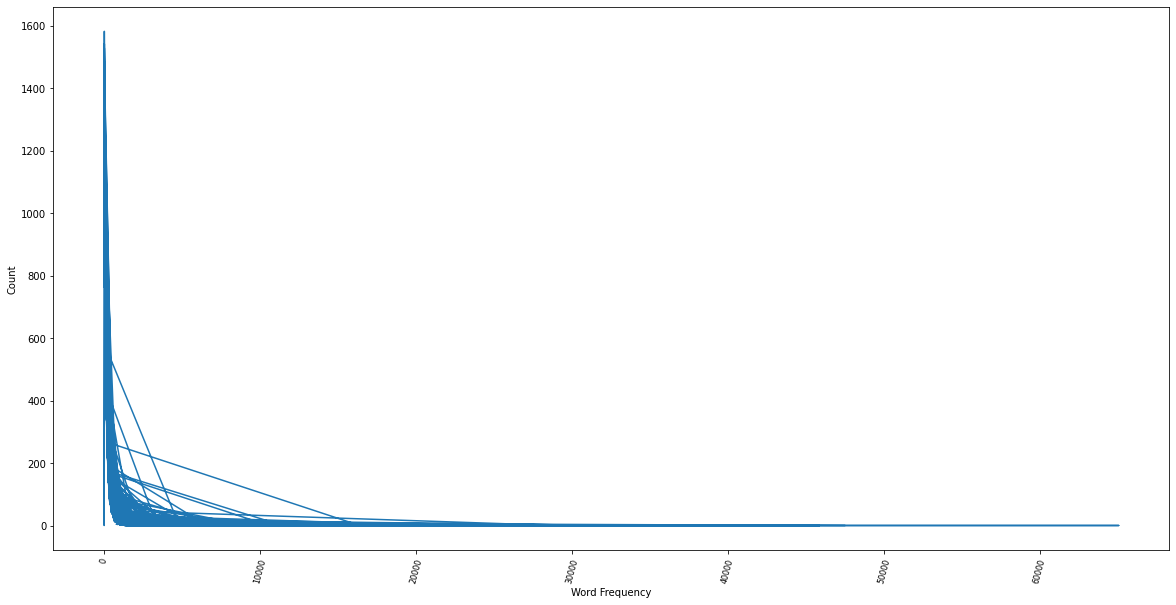

In [8]:
word_freq = {}
frequencies = []

for body in email_df['body'].tolist():
    try:
        words_in_this_body = list(filter(None, body.split(' ')))
    except:
        continue
    word_count = len(words_in_this_body)
    word_freq[word_count] = word_freq.get(word_count, 0) + 1
    frequencies.append(word_count)


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.xticks(rotation=75, fontsize=8)
ax.plot(word_freq.keys(), word_freq.values() )

plt.xlabel('Word Frequency')
plt.ylabel('Count')



Text(0, 0.5, 'Count')

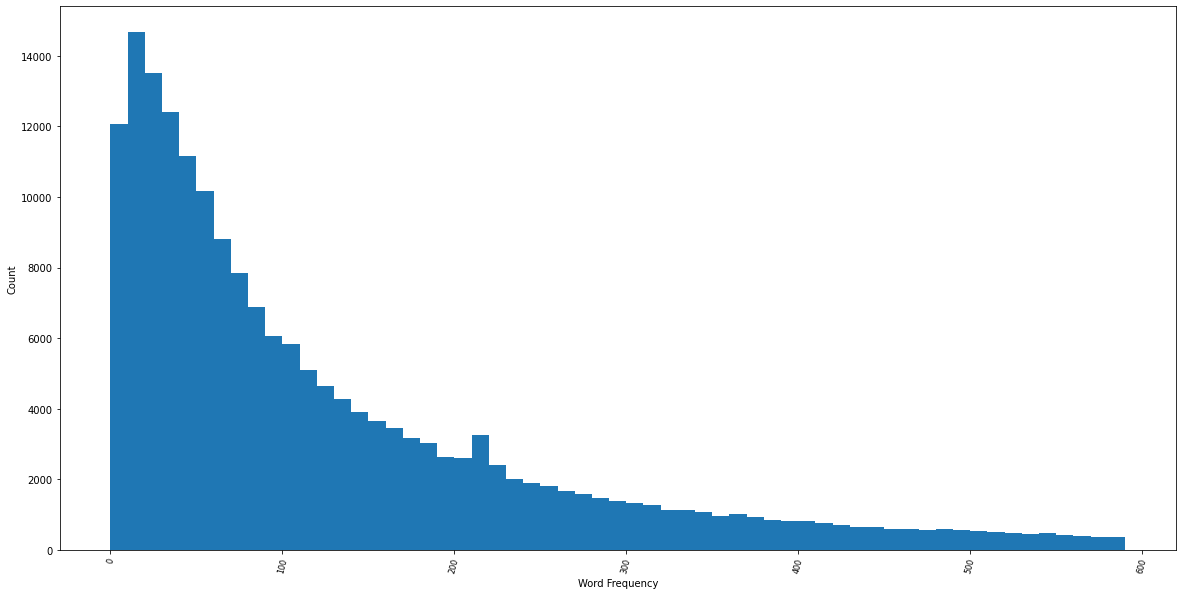

In [9]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.xticks(rotation=75, fontsize=8)
ax.hist(frequencies, bins=range(0, 600, 10)) # Change the bin 1st two parameters two distribute between two ranges, thrid parameter is fo difference

plt.xlabel('Word Frequency')
plt.ylabel('Count')

#### Checked Important Email Senders

In [10]:
largest_emails = email_df.groupby('from_').size().nlargest(5)

<AxesSubplot:xlabel='from_'>

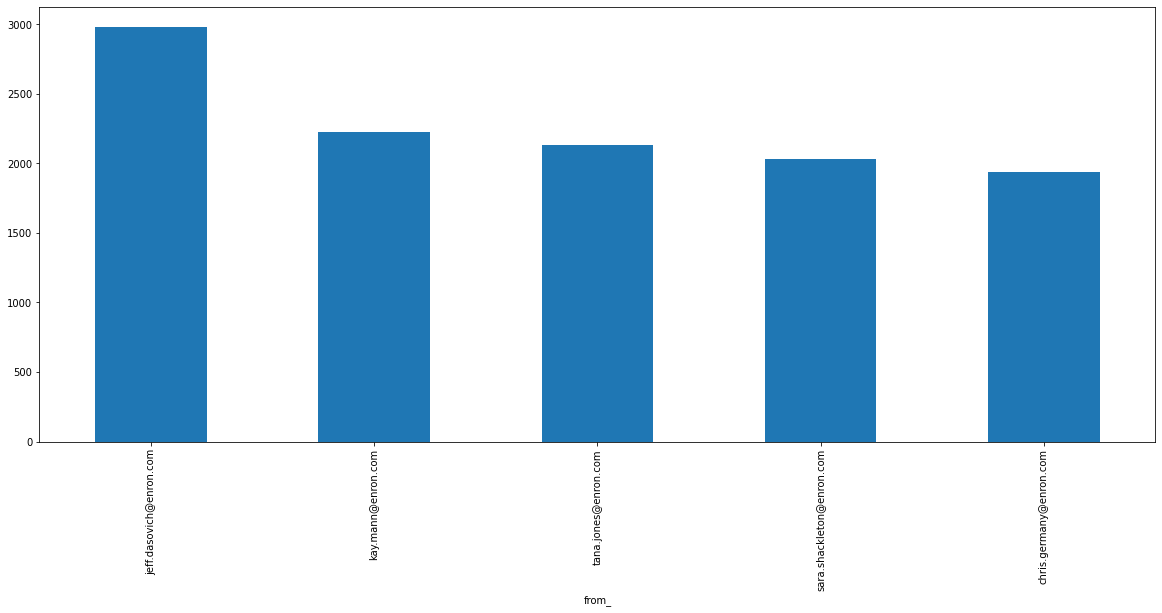

In [11]:
largest_emails.plot.bar()

In [12]:
email_df.to_csv('processed_data/parsed_emails.csv', index = False)

In [13]:
def mark_words(row):
    try:
        if 'project' in row['body']:
            return 'has project word'
    except:
        pass
    return 'no project word'

email_df['project_status'] = email_df.apply(mark_words, axis = 1)

In [14]:
project_email_df = email_df[email_df['project_status'] == 'has project word']

In [15]:
print(len(project_email_df))

8895


In [16]:
project_email_df.to_csv('processed_data/parsed_project_emails.csv', index = False)